In [1]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import single_boxplot, single_histplot, single_violinplot
from ipynb.fs.full.bootstrapping_utils import bootstrapping_numerical_fields, confidence_interval
from statistics import mean, pstdev

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
# remove those who didn't answered
df = df[df['D5_Software_Experience'] != '-99']
# remove one outlier - 255 years is not valid
df = df[df['D5_Software_Experience'] != '255']

In [4]:
# convert column to integer - if you read before this line, you will get an string like '14'
df = df.astype({"D5_Software_Experience": int}, errors='raise') 

In [5]:
valid_answers_list = list(df['D5_Software_Experience'])

In [6]:
bootstrapped_list_data = bootstrapping_numerical_fields(answers=valid_answers_list, population_size=1000)

In [7]:
lower, X_mean, upper = confidence_interval(data_points=bootstrapped_list_data)
print("Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))

Mean: 9.032| Lower: 8.782457266505315| Uper: 9.281542733494685


In [8]:
# d5 dataframe with only one column - plots purpose
d5_df = pd.DataFrame()
d5_df['Software Experience'] = bootstrapped_list_data

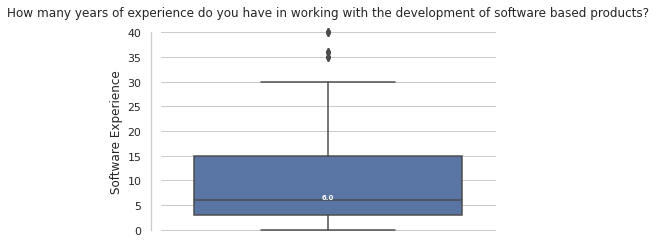

In [9]:
single_boxplot(d5_df, "Software Experience",
               title="How many years of experience do you have in working with the development of software based products?")

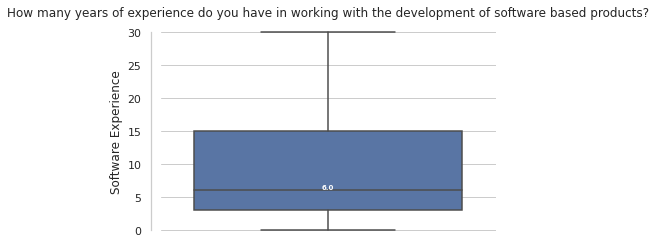

In [10]:
single_boxplot(d5_df, "Software Experience", outliers=False,
               title="How many years of experience do you have in working with the development of software based products?")

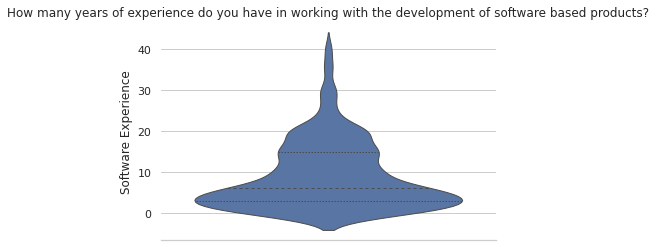

In [11]:
single_violinplot(d5_df, "Software Experience",
                  title="How many years of experience do you have in working with the development of software based products?")

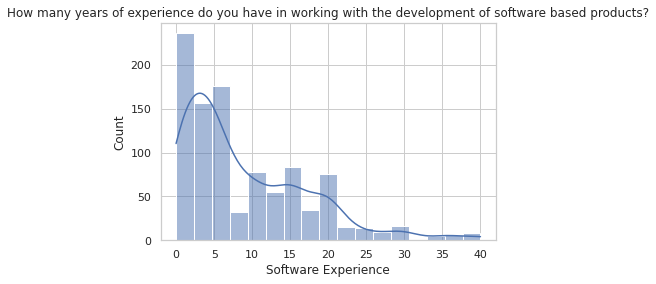

In [12]:
single_histplot(d5_df, "Software Experience",
                title="How many years of experience do you have in working with the development of software based products?")